In [1]:
import tensorflow as tf
import numpy as np
import os
import PIL
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import matplotlib.pyplot as plt
import random
tf.__version__

'2.12.0'

In [2]:
path = "H:/Barbosa/Downloads/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
with open("H:/Python/MachineLearning/1/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("H:/Python/MachineLearning/1/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open("H:/Python/MachineLearning/1/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [4]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [5]:
X_train, y_train = train['features'], train['labels'] #pixels e respostas respectivamente
X_test, y_test = test['features'], test['labels'] #pixels e respostas respectivamente
X_validation, y_validation = valid['features'], valid['labels'] #pixels e respostas respectivamente

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
X_validation.shape

(4410, 32, 32, 3)

1

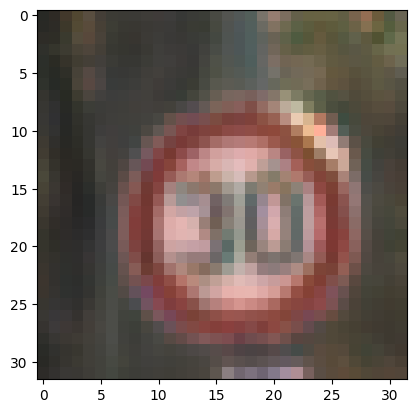

In [10]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

35

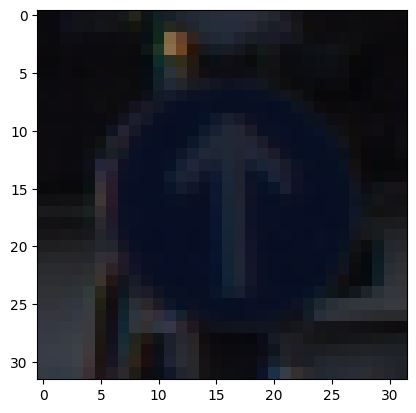

In [11]:
i = 3100
plt.imshow(X_test[i])
y_test[i]

10

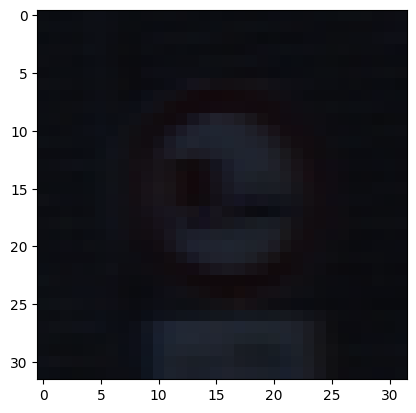

In [12]:
i = random.randint(1, 500)
plt.imshow(X_test[i])
y_test[i]

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
#Transformar a imagem para cinza (1 canal RGB)
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)

In [15]:
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)

In [16]:
X_validation_gray = np.sum(X_validation / 3, axis=3, keepdims=True)

In [17]:
X_train_gray.shape

(34799, 32, 32, 1)

In [18]:
X_test_gray.shape

(12630, 32, 32, 1)

In [19]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [20]:
#Transformar entre 0 e 1 (normalização)
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [21]:
np.max(X_train_gray_norm)

0.9921875

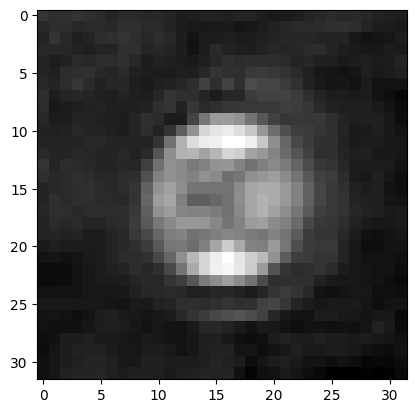

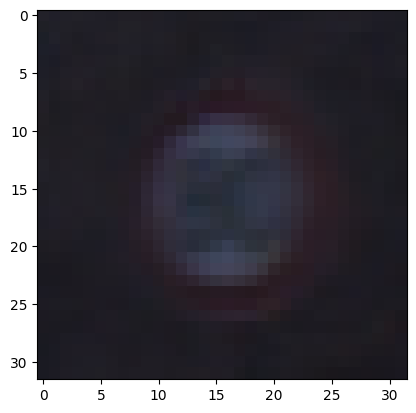

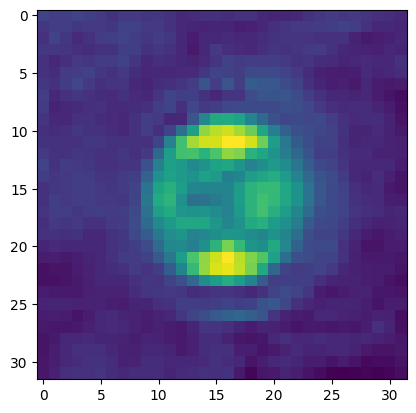

In [22]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i])

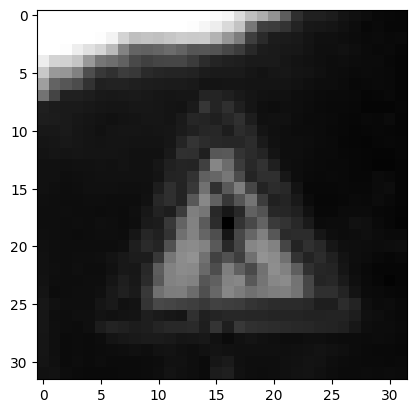

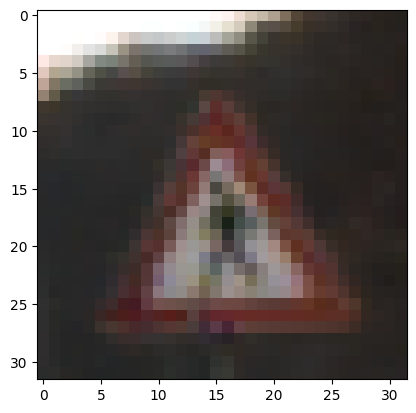

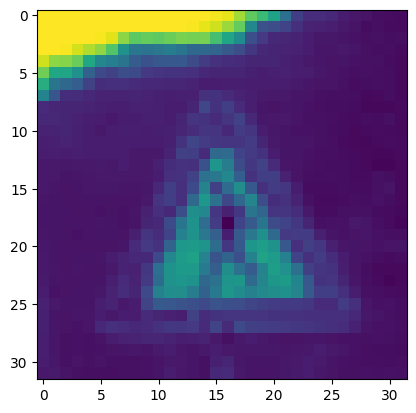

In [23]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i])

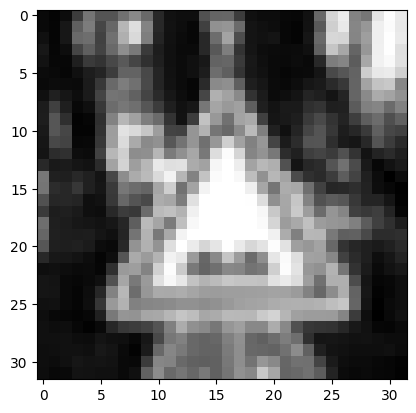

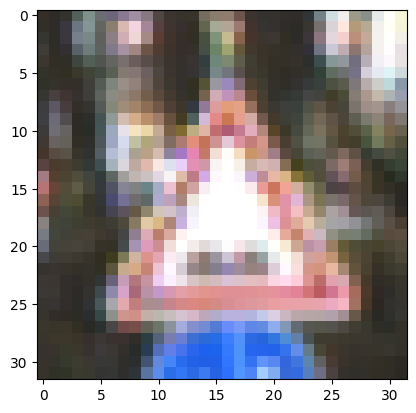

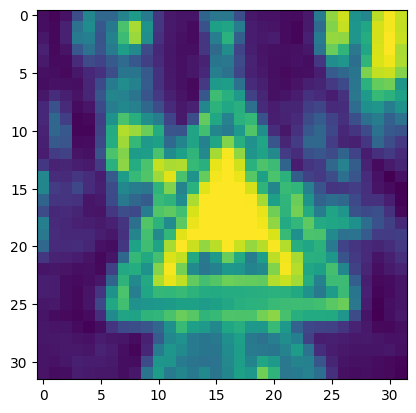

In [24]:
i = 600
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i])

In [25]:
from tensorflow.keras import layers, models
LeNet = models.Sequential()
LeNet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D())
LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
LeNet.add(layers.AveragePooling2D())
LeNet.add(layers.Flatten())
LeNet.add(layers.Dense(120, activation='relu'))
LeNet.add(layers.Dense(84, activation='relu'))
LeNet.add(layers.Dense(43, activation='softmax'))

In [26]:
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [27]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 5s 66ms/step - loss: 3.1946 - accuracy: 0.1722 - val_loss: 2.7588 - val_accuracy: 0.2857
Epoch 2/50
70/70 [==============================] - 5s 66ms/step - loss: 1.7205 - accuracy: 0.5269 - val_loss: 1.5625 - val_accuracy: 0.5342
Epoch 3/50
70/70 [==============================] - 5s 66ms/step - loss: 0.9543 - accuracy: 0.7263 - val_loss: 1.0621 - val_accuracy: 0.6771
Epoch 4/50
70/70 [==============================] - 4s 64ms/step - loss: 0.6660 - accuracy: 0.8153 - val_loss: 0.8350 - val_accuracy: 0.7560
Epoch 5/50
70/70 [==============================] - 4s 64ms/step - loss: 0.5151 - accuracy: 0.8615 - val_loss: 0.7301 - val_accuracy: 0.7780
Epoch 6/50
70/70 [==============================] - 4s 63ms/step - loss: 0.4235 - accuracy: 0.8880 - val_loss: 0.6628 - val_accuracy: 0.8147
Epoch 7/50
70/70 [==============================] - 4s 64ms/step - loss: 0.3663 - accuracy: 0.9026 - val_loss: 0.6267 - val_accuracy: 0.8147
Epoch 8/50
70

395/395 [==============================] - 2s 4ms/step


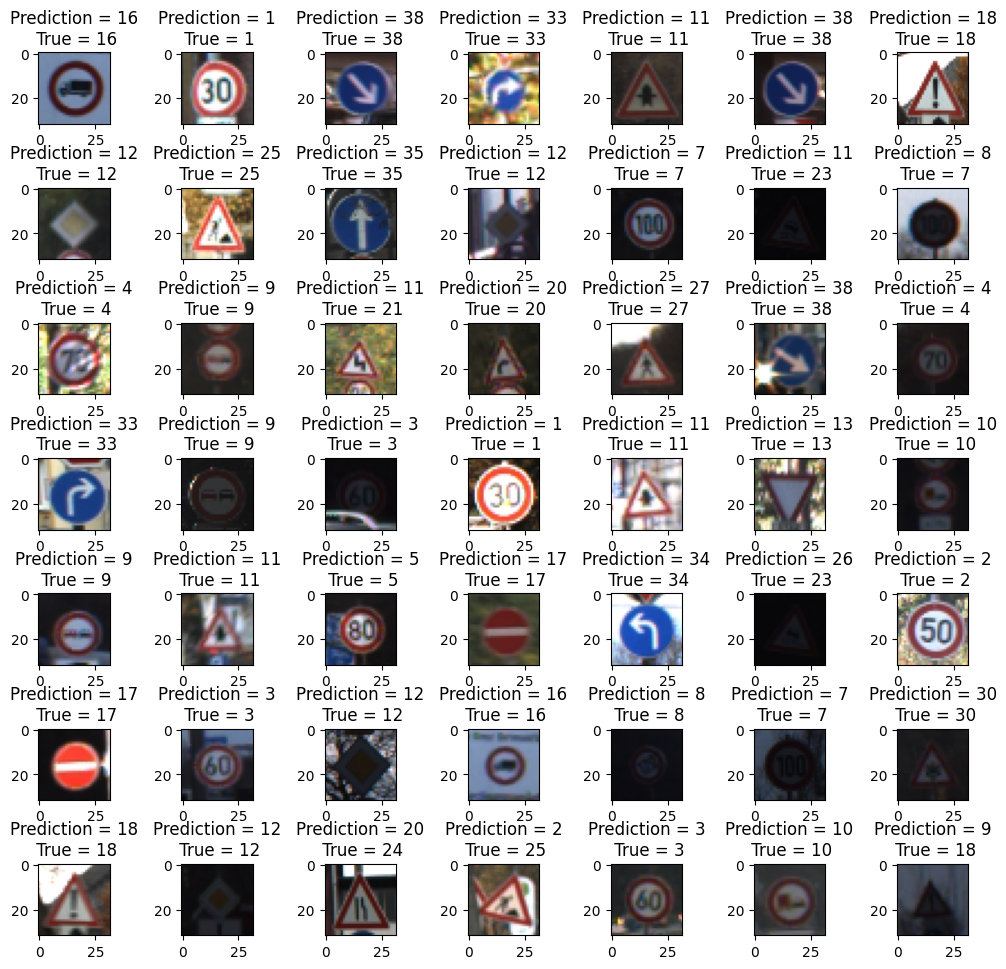

In [33]:
L = 7
W = 7
predicted_classes = np.argmax(LeNet.predict(X_test_gray_norm), axis=1)
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_true = y_test
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('on')
plt.subplots_adjust(wspace = 1)

In [ ]:
#Resumo
"""
    Redes neurais convolucionais utilizam da matemática para aplicar filtros na imagem
    A arquitetura lenet acontece da seguinte forma:
    - A imagem é aplicada 6 filtros para distorção e pegar melhor os pixels (imagem 32x32)
    A principio a imagem será de 28x28
    é aplicado o pooling (serve para reduzir a dimensão dos valores de uma convolução)
    - A imagem é transformada em 14x14
    logo após são aplicados 16 filtros em uma imagem 10x10
    utilizada o pooling
    e assim a imagem é aplicada 16 filtros transformada em 5 x 5
    
    Transformamos as informações de array para vetor de uma dimensão (LeNet.add(layers.Flatten()))
    
    Construimos uma rede neural de 120 neoronios
    uma de escondida de 84
    e uma de saída com o número de classes que o modelo tem, no caso 43
    
    Observações:
    Para redes neurais, é comum transformar as imagens em preto e branco, ou seja, as classes vão ter que
    ter números iguais
    
    Exemplo (123,123,123) (R, G ,B)
    Portanto, transformamos da seguinte forma:
    X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
"""